<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/17_Clusteriza%C3%A7%C3%A3o_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#manipulação de daos
import pandas as pd
import numpy as np

#graficos
import matplotlib.pyplot as plt
import seaborn as sns

#machine learne
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
df_penguins = pd.read_csv('/content/penguins (1).csv')
df_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [24]:
df_penguins.columns = [ 'Comprimento do Bico', 'Altura do Bico', 'Comprimento da Nadadeira', 'Massa Corporal', 'Espécie' ]

In [25]:
df_penguins.isnull().sum()

,0
Comprimento do Bico,2
Altura do Bico,2
Comprimento da Nadadeira,2
Massa Corporal,2
Espécie,0


In [26]:
df_penguins = df_penguins.ffill()

In [27]:
df_penguins.describe().round(2)

,Comprimento do Bico,Altura do Bico,Comprimento da Nadadeira,Massa Corporal,Espécie
count,344.00,344.00,344.00,344.00,344.00
mean,43.92,17.14,200.94,4201.09,0.76
std,5.45,1.98,14.04,802.21,0.76
min,32.10,13.10,172.00,2700.00,0.00
25%,39.28,15.58,190.00,3550.00,0.00
50%,44.45,17.30,197.00,4050.00,1.00
75%,48.50,18.70,213.25,4756.25,1.00
max,59.60,21.50,231.00,6300.00,2.00


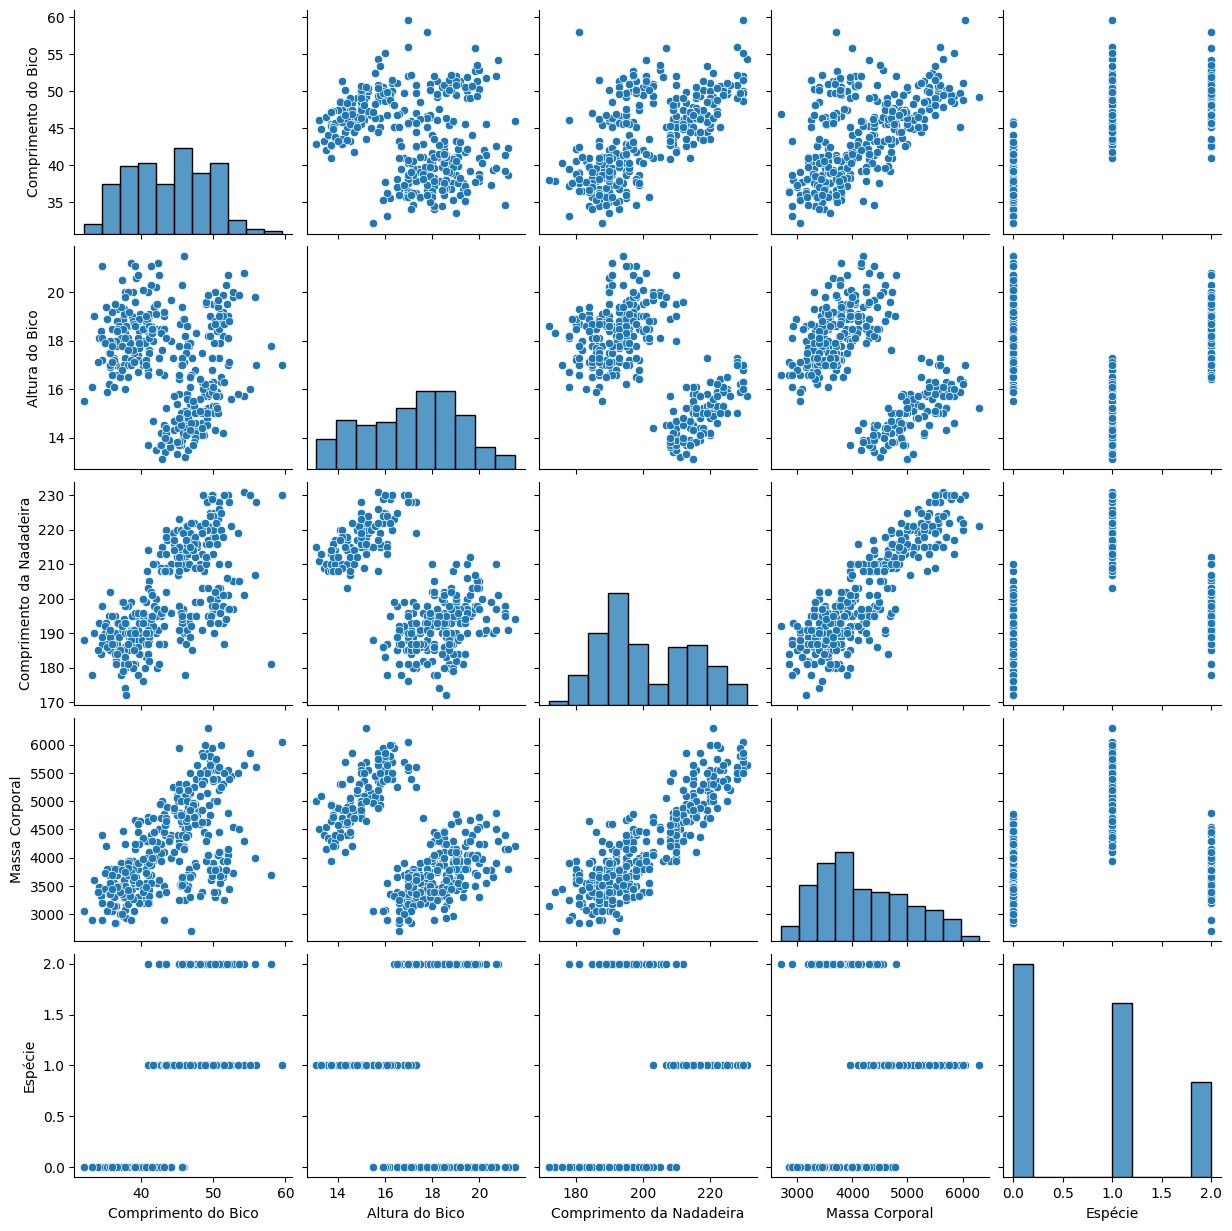

In [38]:
sns.pairplot(df_penguins) #hue='Espécie')

In [34]:
#seleção de varaiveis
df_modelo = df_penguins[['Massa Corporal','Altura do Bico']].copy()

# padronizar a escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_model_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                               index=df_modelo.index,
                               columns=df_modelo.columns)

In [35]:
df_model_scaled.describe().round(2)

,Massa Corporal,Altura do Bico
count,344.00,344.00
mean,0.00,0.00
std,1.00,1.00
min,-1.87,-2.05
25%,-0.81,-0.79
50%,-0.19,0.08
75%,0.69,0.79
max,2.62,2.21


<Axes: xlabel='Altura do Bico', ylabel='Massa Corporal'>

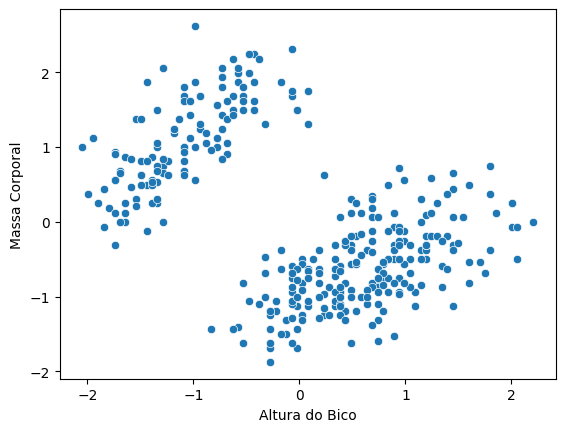

In [36]:
sns.scatterplot(df_model_scaled, x='Altura do Bico',y='Massa Corporal')

In [37]:
modelo_km = KMeans(n_clusters=2,
                   #se antes das 300 iterações que é volar padrao
                   #ele definir quais são os grupos que cada elemento pertence
                   # ele para as execuções
                   random_state=42, max_iter=1000) # max_iter - maximo de iteração
modelo_km.fit(df_model_scaled)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [39]:
cluster =modelo_km.predict(df_model_scaled)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
lista =  modelo_km.cluster_centers_

In [45]:
modelo_km.cluster_centers_

array([[-0.61476287,  0.61966325],
       [ 1.09070832, -1.09940255]])

<Axes: xlabel='Massa Corporal', ylabel='Altura do Bico'>

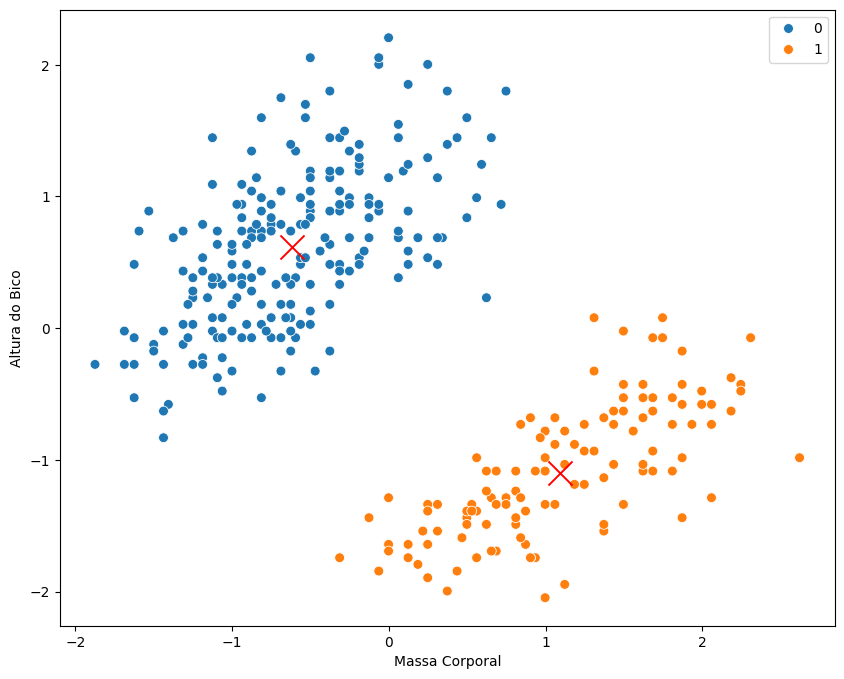

In [46]:
fig = plt.figure(figsize=(10,8))


sns.scatterplot(df_model_scaled,x='Massa Corporal',y='Altura do Bico',hue=cluster,s=50)


sns.scatterplot(x=lista[:,0],
                y=lista[:,1],
                marker='x',s=300,
                color='red')


In [47]:
modelo_km.inertia_

222.98549974388285

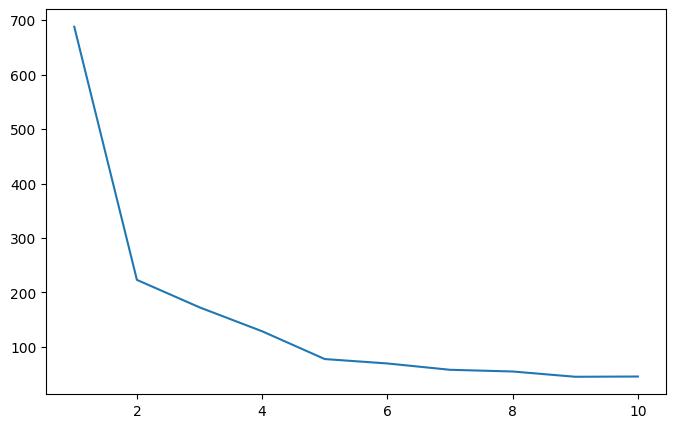

In [48]:
# Utilizando elbow curve ou metodo do cotovelo
range_n_cluster = [1,2,3,4,5,6,7,8,9,10]
inercia=[]

for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df_model_scaled)
    inercia.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_cluster,y=inercia)

### Modelo com 3 Centroides

In [50]:
modelo_km = KMeans(n_clusters=3,
                   #se antes das 300 iterações que é volar padrao
                   #ele definir quais são os grupos que cada elemento pertence
                   # ele para as execuções
                   random_state=42, max_iter=1000) # max_iter - maximo de iteração
modelo_km.fit(df_model_scaled)

KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [51]:
cluster =modelo_km.predict(df_model_scaled)
cluster

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0,

In [52]:
lista =  modelo_km.cluster_centers_

<Axes: xlabel='Massa Corporal', ylabel='Altura do Bico'>

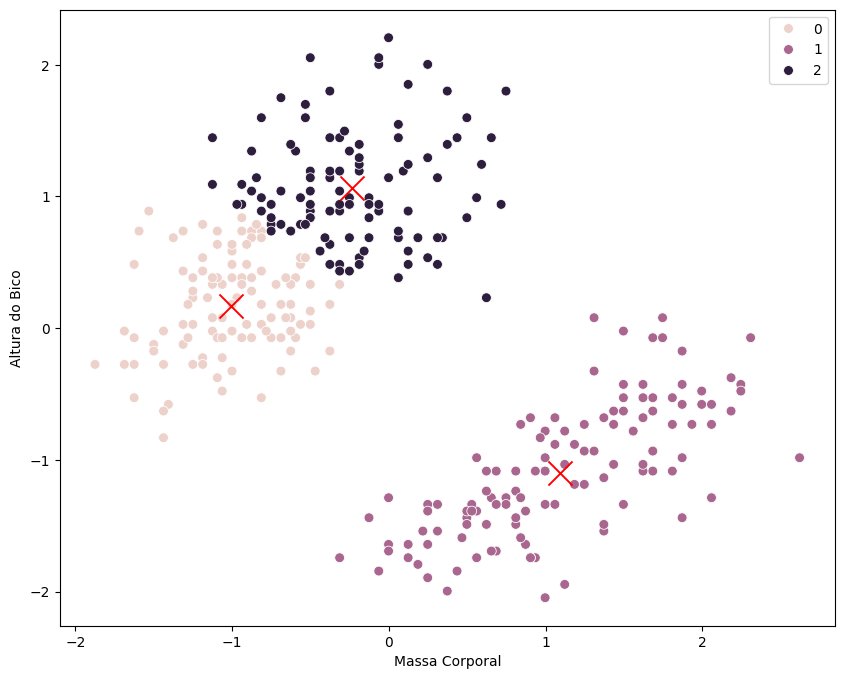

In [53]:
fig = plt.figure(figsize=(10,8))


sns.scatterplot(df_model_scaled,x='Massa Corporal',y='Altura do Bico',hue=cluster,s=50)


sns.scatterplot(x=lista[:,0],
                y=lista[:,1],
                marker='x',s=300,
                color='red')
